In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#null hypothesis 
#there is no significant difference in the cognitive ability between gender 

In [16]:
#calculate pvalue for t-test (spatial recognition ability) 
#read data from csv file 
filename = "spatial_recognition_responses.csv"
sr_df = pd.read_csv(filename)

#drop the items that are not needed for the calculation 
sr_df = sr_df.drop( [ 'name', 'time_taken',  'age'], axis='columns' )

#male and female score pulled out from data
male_scores = sr_df[sr_df['sex'] == 'male']['score']
female_scores = sr_df[sr_df['sex'] == 'female']['score']

#find mean 
m_mean = male_scores.mean()
f_mean = female_scores.mean()

#find difference in mean
diff_mean = m_mean - f_mean
print(diff_mean)
#mean score of male is 0.7778 points greater than female 
#0.7778 difference in score 

#calculate significant difference using t-test
result_sr = stats.ttest_ind(male_scores, female_scores)
result_sr.pvalue

0.7777777777777781


0.33575857115284746

In [ ]:
###intepreting the t-test p-value -> spatial recognition ability <- ### 
#p-value = 0.3358

# If p-value ≤ alpha:
# Reject the null hypothesis.
# Conclude that there is evidence to suggest a significant effect or difference.

# If p-value > alpha:
# Fail to reject the null hypothesis.
# Conclude that there is not enough evidence to suggest a significant effect or difference.

#alpha chosen = 0.05 (0.5%) 
#since p-value > 0.05
#null hypothesis can be accepted
#meaning that there is not enough evidence to suggest a significant effect or difference in the spatial recognition of male and female.

In [ ]:
#displaying results 
#sr_df.head()

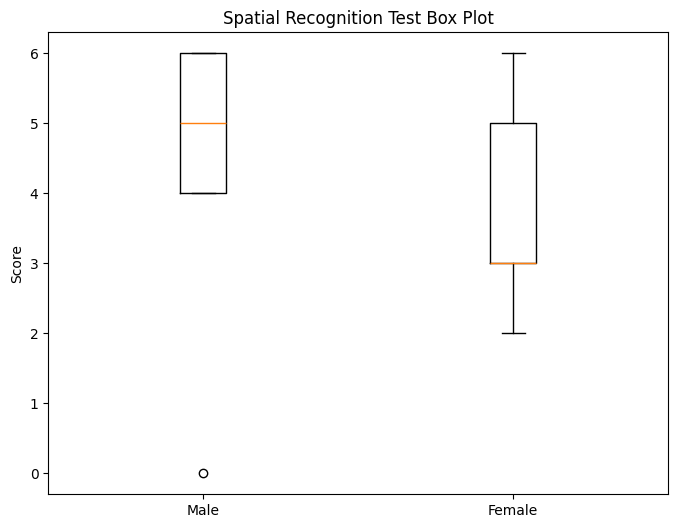

In [14]:
#create a box plot using Matplotlib
plt.figure(figsize=(8,6))
plt.boxplot([male_scores, female_scores], labels = ['Male','Female'])

#set labels and title
plt.ylabel('Score')
plt.title('Spatial Recognition Test Box Plot')

#show the plot
plt.show()

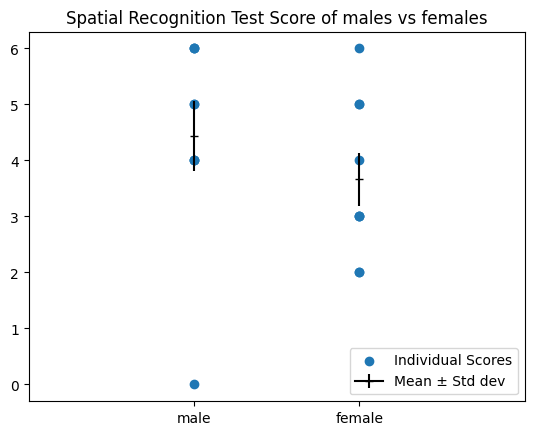

In [20]:
#plot dot graph 

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(sr_df['sex'],sr_df['score'],'.')
#x-axis limits for 2 categories 
#range from 0 to 1 
#adjust for nicer spacing 
ax.set_xlim(-1,2) 

#score categorised by sex
m_df = male_scores 
f_df = female_scores

#mean 
m_mean = m_df.mean()
f_mean = f_df.mean()

#standard_error of both sex 
m_std_error = stats.sem(m_df)
f_std_error = stats.sem(f_df)

#draw the mean with error bars 
ax.scatter(sr_df['sex'], sr_df['score'], label='Individual Scores')
ax.errorbar('male', m_mean, yerr=m_std_error, marker='_', color='black',label='Mean ± Std dev')
ax.errorbar('female', f_mean, yerr=f_std_error, marker='_', color='black')

ax.set_title("Spatial Recognition Test Score of males vs females")
plt.legend()

plt.show()